In [1]:
### import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

### lets read some specific columns of rating.csv..
data=pd.read_csv(r'F:\Data_science_projects\Recommendation_sytem\Movielens\datasets/rating.csv',usecols=['userId','movieId','rating'])

In [3]:
data.head(3)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5


In [4]:
data.shape

(20000263, 3)

In [5]:
## if system is unable to handle huge data , we can think of a sample as :
df=data[0:100000]

In [6]:
df.shape

(100000, 3)

In [7]:
df.head(3)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5


In [8]:
titles=pd.read_csv(r'F:\Data_science_projects\Recommendation_sytem\Movielens\datasets/movie.csv')

In [9]:
titles.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [10]:
# Merge the ratings and movies dataframe
df2=pd.merge(df,titles,on='movieId')

In [11]:
df2.shape

(100000, 5)

In [12]:
df2.head(2)

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy


In [16]:
movie_rating_count=df2.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'TotalRatingCount'})

In [17]:
movie_rating_count

,title,TotalRatingCount
0,'Hellboy': The Seeds of Creation (2004),1
1,'Neath the Arizona Skies (1934),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",14
...,...,...
8220,"\\""Great Performances\""\"" Cats (1998)""",1
8221,eXistenZ (1999),35
8222,xXx (2002),22
8223,xXx: State of the Union (2005),4


In [18]:
final=df2.merge(movie_rating_count,on='title',how='left')

In [19]:
final.head(3)

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112


In [20]:
final.to_csv(r'F:\Data_science_projects\Recommendation_sytem\Movielens\datasets/clean_data.csv',index=False)

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalRatingCount'>

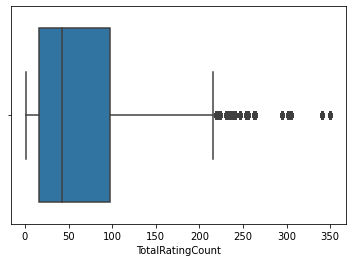

In [21]:
sns.boxplot(final['TotalRatingCount'])

In [22]:
final['TotalRatingCount'].quantile(0.1)

5.0

In [25]:
for i in range(0,101,10):
    print('{}th percentile value is {}'.format(i,final['TotalRatingCount'].quantile(i/100)))

0th percentile value is 1.0
10th percentile value is 5.0
20th percentile value is 11.0
30th percentile value is 20.0
40th percentile value is 29.0
50th percentile value is 42.0
60th percentile value is 61.0
70th percentile value is 80.0
80th percentile value is 112.0
90th percentile value is 164.0
100th percentile value is 350.0


In [27]:
## final[final['TotalRatingCount']>61]

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
...,...,...,...,...,...,...
81426,637,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73
81427,648,5989,4.0,Catch Me If You Can (2002),Crime|Drama,73
81428,650,5989,2.0,Catch Me If You Can (2002),Crime|Drama,73
81429,662,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73


In [30]:
threshold=61
rating_popular_movie=final.query('TotalRatingCount >@threshold')


In [31]:
rating_popular_movie

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
...,...,...,...,...,...,...
81426,637,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73
81427,648,5989,4.0,Catch Me If You Can (2002),Crime|Drama,73
81428,650,5989,2.0,Catch Me If You Can (2002),Crime|Drama,73
81429,662,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73


In [32]:
rating_popular_movie.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'TotalRatingCount'], dtype='object')

In [34]:
moviemat=rating_popular_movie.pivot_table(index='userId',columns='title',values='rating')

In [35]:
moviemat

title,12 Angry Men (1957),2001: A Space Odyssey (1968),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Air Force One (1997),Airplane! (1980),Aladdin (1992),...,What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000),X2: X-Men United (2003),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,4.0,4.0
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,...,3.0,4.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,4.0,NaN,NaN,4.0,3.0,NaN,3.0,NaN,4.0,NaN,...,NaN,5.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.5


In [36]:
moviemat['Airplane! (1980)']

userId
1      NaN
2      2.0
3      5.0
4      NaN
5      NaN
      ... 
698    NaN
699    4.0
700    NaN
701    NaN
702    NaN
Name: Airplane! (1980), Length: 697, dtype: float64

In [38]:
### finding similar movies with respect to Airplane! (1980)
similarity=moviemat.corrwith(moviemat['Airplane! (1980)'])

In [40]:
similarity.sort_values(ascending=False)

title
Airplane! (1980)                                        1.000000
Casper (1995)                                           0.680396
Galaxy Quest (1999)                                     0.661684
Bridge on the River Kwai, The (1957)                    0.629462
Santa Clause, The (1994)                                0.603553
                                                          ...   
Crying Game, The (1992)                                -0.301612
Desperado (1995)                                       -0.330267
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)   -0.349704
Mr. Holland's Opus (1995)                              -0.357667
As Good as It Gets (1997)                              -0.402779
Length: 357, dtype: float64

In [44]:
co_Reln=similarity.sort_values(ascending=False).reset_index().rename(columns={0:'co-reln values'})

In [45]:
co_Reln

,title,co-reln values
0,Airplane! (1980),1.000000
1,Casper (1995),0.680396
2,Galaxy Quest (1999),0.661684
3,"Bridge on the River Kwai, The (1957)",0.629462
4,"Santa Clause, The (1994)",0.603553
...,...,...
352,"Crying Game, The (1992)",-0.301612
353,Desperado (1995),-0.330267
354,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704
355,Mr. Holland's Opus (1995),-0.357667


In [46]:
rating_popular_movie

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
...,...,...,...,...,...,...
81426,637,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73
81427,648,5989,4.0,Catch Me If You Can (2002),Crime|Drama,73
81428,650,5989,2.0,Catch Me If You Can (2002),Crime|Drama,73
81429,662,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73


In [50]:
rat=rating_popular_movie.groupby('title').agg({'title':'count','rating':'mean'}).rename(columns={'title':'total_ratings','rating':'avg_rating'}).reset_index()

In [51]:
rat

,title,total_ratings,avg_rating
0,12 Angry Men (1957),73,4.164384
1,2001: A Space Odyssey (1968),128,4.003906
2,A.I. Artificial Intelligence (2001),63,3.111111
3,"Abyss, The (1989)",89,3.494382
4,Ace Ventura: Pet Detective (1994),193,2.891192
...,...,...,...
352,Willy Wonka & the Chocolate Factory (1971),139,3.744604
353,"Wizard of Oz, The (1939)",117,3.944444
354,X-Men (2000),132,3.621212
355,X2: X-Men United (2003),76,3.664474


In [53]:
cor=co_Reln.merge(rat,on='title')

In [54]:
cor

,title,co-reln values,total_ratings,avg_rating
0,Airplane! (1980),1.000000,84,3.666667
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
...,...,...,...,...
352,"Crying Game, The (1992)",-0.301612,62,3.782258
353,Desperado (1995),-0.330267,80,3.262500
354,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704,128,4.273438
355,Mr. Holland's Opus (1995),-0.357667,100,3.815000


In [56]:
cor.sort_values('co-reln values',ascending=False)[1:11]

,title,co-reln values,total_ratings,avg_rating
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
5,Unforgiven (1992),0.602800,79,3.791139
6,Tomorrow Never Dies (1997),0.602446,71,3.267606
7,Monty Python and the Holy Grail (1975),0.601236,166,4.186747
8,"Terminator, The (1984)",0.580656,160,3.912500
9,Coneheads (1993),0.556090,85,2.882353
10,Chicken Run (2000),0.544424,76,3.322368


In [57]:
def recommend_movies(movie):
    similarity=moviemat.corrwith(moviemat[movie])
    return similarity.sort_values(ascending=False)

In [59]:
## lets consider similar movies with respect to 'Casper (1995)'
recommend_movies('Casper (1995)')[1:11]

title
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.880848
Pleasantville (1998)                                                                              0.866816
Notting Hill (1999)                                                                               0.802955
Talented Mr. Ripley, The (1999)                                                                   0.799671
City of God (Cidade de Deus) (2002)                                                               0.798554
Little Mermaid, The (1989)                                                                        0.794992
Naked Gun 33 1/3: The Final Insult (1994)                                                         0.781180
Last Action Hero (1993)                                                                           0.776395
Big (1988)                                                                                        0.770552
Beetlejuice (1988)             